# Final Case Study

In [32]:
#Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #This library is built on matplotlib with enhanced graphing capabilities
from statsmodels.tsa.stattools import adfuller #adding this library to conduct adfuller tests
from statsmodels.tsa.stattools import acf
from numpy import log
import time
import gc
import warnings
from scipy.stats import uniform, randint
import json

#machine learning libraries

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, accuracy_score, roc_curve, roc_auc_score, precision_score, recall_score, ConfusionMatrixDisplay, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

import sys

warnings.filterwarnings("ignore")


In [33]:
file_path = 'transactions.txt'

data = []

with open(file_path, 'r') as file:
    for line in file:
        # Replace empty string with null and parse JSON
        line = line.replace('""', 'null')
        data.append(json.loads(line))

df = pd.DataFrame(data)

In [34]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
accountNumber,737265056,737265056,737265056,737265056,830329091,830329091,830329091,830329091,830329091,830329091
customerId,737265056,737265056,737265056,737265056,830329091,830329091,830329091,830329091,830329091,830329091
creditLimit,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
availableMoney,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,4990.63,5000.0
transactionDateTime,2016-08-13T14:27:32,2016-10-11T05:05:54,2016-11-08T09:18:39,2016-12-10T02:14:50,2016-03-24T21:04:46,2016-04-19T16:24:27,2016-05-21T14:50:35,2016-06-03T00:31:21,2016-06-10T01:21:46,2016-07-11T10:47:16
transactionAmount,98.55,74.51,7.47,7.47,71.18,30.76,57.28,9.37,523.67,164.37
merchantName,Uber,AMC #191138,Play Store,Play Store,Tim Hortons #947751,In-N-Out #422833,Krispy Kreme #685312,Shake Shack #968081,Burger King #486122,Five Guys #510989
acqCountry,US,US,US,US,US,US,US,US,None,US
merchantCountryCode,US,US,US,US,US,US,US,US,US,US
posEntryMode,02,09,09,09,02,02,02,05,02,05


In [35]:
# Count null values in each column
null_counts = df.isnull().sum()
print(null_counts)

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             

In [36]:
drop_column = ['customerId', 'echoBuffer', 'merchantCity', 'merchantState', 'recurringAuthInd', 'merchantZip', 'posOnPremises']

df = df.drop(columns=drop_column)

In [37]:
df.head(30).T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
accountNumber,737265056,737265056,737265056,737265056,830329091,830329091,830329091,830329091,830329091,830329091,...,574788567,574788567,574788567,574788567,574788567,574788567,574788567,574788567,574788567,574788567
creditLimit,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,...,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0
availableMoney,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,4990.63,5000.0,...,2108.39,2500.0,2391.14,2362.91,2336.74,2121.58,2500.0,2464.86,2440.42,2300.98
transactionDateTime,2016-08-13T14:27:32,2016-10-11T05:05:54,2016-11-08T09:18:39,2016-12-10T02:14:50,2016-03-24T21:04:46,2016-04-19T16:24:27,2016-05-21T14:50:35,2016-06-03T00:31:21,2016-06-10T01:21:46,2016-07-11T10:47:16,...,2016-01-29T21:44:33,2016-02-06T08:16:46,2016-02-12T03:47:24,2016-02-22T17:32:13,2016-02-28T15:53:52,2016-02-28T16:43:46,2016-03-02T21:49:24,2016-03-05T22:24:50,2016-03-09T14:41:15,2016-03-10T00:59:51
transactionAmount,98.55,74.51,7.47,7.47,71.18,30.76,57.28,9.37,523.67,164.37,...,4.11,108.86,28.23,26.17,215.16,15.83,35.14,24.44,139.44,235.74
merchantName,Uber,AMC #191138,Play Store,Play Store,Tim Hortons #947751,In-N-Out #422833,Krispy Kreme #685312,Shake Shack #968081,Burger King #486122,Five Guys #510989,...,Convenient Auto Services,Fast Auto Services,Washington Repair,Washington Repair,staples.com,Convenient Repair,Shell Repair,Shell Auto Body,Eazy Repair,Fast Repair
acqCountry,US,US,US,US,US,US,US,US,None,US,...,US,US,US,US,US,US,US,US,US,US
merchantCountryCode,US,US,US,US,US,US,US,US,US,US,...,US,US,US,US,US,US,US,US,US,US
posEntryMode,02,09,09,09,02,02,02,05,02,05,...,05,09,05,02,02,09,02,09,05,80
posConditionCode,01,01,01,01,01,01,01,01,01,08,...,01,01,01,01,01,01,01,08,01,01


In [38]:
uniqueAcc = df['merchantName'].nunique()

In [39]:
print(uniqueAcc)

2490


In [40]:
#identify duplicate rows
duplicateRows = df[df.duplicated()]

#view duplicate rows
duplicateRows

,accountNumber,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud


In [41]:
df2 = df[['accountNumber', 'transactionAmount', 'merchantName', 'isFraud', 'transactionDateTime']];
df2.head(10).T

,0,1,2,3,4,5,6,7,8,9
accountNumber,737265056,737265056,737265056,737265056,830329091,830329091,830329091,830329091,830329091,830329091
transactionAmount,98.55,74.51,7.47,7.47,71.18,30.76,57.28,9.37,523.67,164.37
merchantName,Uber,AMC #191138,Play Store,Play Store,Tim Hortons #947751,In-N-Out #422833,Krispy Kreme #685312,Shake Shack #968081,Burger King #486122,Five Guys #510989
isFraud,False,False,False,False,False,False,False,False,False,False
transactionDateTime,2016-08-13T14:27:32,2016-10-11T05:05:54,2016-11-08T09:18:39,2016-12-10T02:14:50,2016-03-24T21:04:46,2016-04-19T16:24:27,2016-05-21T14:50:35,2016-06-03T00:31:21,2016-06-10T01:21:46,2016-07-11T10:47:16


In [42]:
df['datetime'] = pd.to_datetime(df['transactionDateTime'])

# Display the DataFrame with datetime column
print("Original DataFrame:")
print(df)

Original DataFrame:
       accountNumber  creditLimit  availableMoney  transactionDateTime  \
0          737265056       5000.0         5000.00  2016-08-13T14:27:32   
1          737265056       5000.0         5000.00  2016-10-11T05:05:54   
2          737265056       5000.0         5000.00  2016-11-08T09:18:39   
3          737265056       5000.0         5000.00  2016-12-10T02:14:50   
4          830329091       5000.0         5000.00  2016-03-24T21:04:46   
...              ...          ...             ...                  ...   
786358     732852505      50000.0        48904.96  2016-12-22T18:44:12   
786359     732852505      50000.0        48785.04  2016-12-25T16:20:34   
786360     732852505      50000.0        48766.15  2016-12-27T15:46:24   
786361     732852505      50000.0        48716.72  2016-12-29T00:30:55   
786362     732852505      50000.0        48666.83  2016-12-30T20:10:29   

        transactionAmount         merchantName acqCountry merchantCountryCode  \
0         

In [43]:
df['date'] = df['datetime'].dt.date
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
df['second'] = df['datetime'].dt.second

# Drop the original datetime string and datetime columns if needed
df.drop(['transactionDateTime', 'datetime'], axis=1, inplace=True)

df.head(10).T

,0,1,2,3,4,5,6,7,8,9
accountNumber,737265056,737265056,737265056,737265056,830329091,830329091,830329091,830329091,830329091,830329091
creditLimit,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
availableMoney,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,4990.63,5000.0
transactionAmount,98.55,74.51,7.47,7.47,71.18,30.76,57.28,9.37,523.67,164.37
merchantName,Uber,AMC #191138,Play Store,Play Store,Tim Hortons #947751,In-N-Out #422833,Krispy Kreme #685312,Shake Shack #968081,Burger King #486122,Five Guys #510989
acqCountry,US,US,US,US,US,US,US,US,None,US
merchantCountryCode,US,US,US,US,US,US,US,US,US,US
posEntryMode,02,09,09,09,02,02,02,05,02,05
posConditionCode,01,01,01,01,01,01,01,01,01,08
merchantCategoryCode,rideshare,entertainment,mobileapps,mobileapps,fastfood,fastfood,fastfood,fastfood,fastfood,fastfood


In [44]:
df3 = df[['accountNumber', 'transactionAmount', 'date', 'hour', 'minute']];
df3.head(10).T

,0,1,2,3,4,5,6,7,8,9
accountNumber,737265056,737265056,737265056,737265056,830329091,830329091,830329091,830329091,830329091,830329091
transactionAmount,98.55,74.51,7.47,7.47,71.18,30.76,57.28,9.37,523.67,164.37
date,2016-08-13,2016-10-11,2016-11-08,2016-12-10,2016-03-24,2016-04-19,2016-05-21,2016-06-03,2016-06-10,2016-07-11
hour,14,5,9,2,21,16,14,0,1,10
minute,27,5,18,14,4,24,50,31,21,47


In [45]:
#identify duplicate rows
duplicateRows = df3[df3.duplicated()]

#view duplicate rows
print(duplicateRows)

       accountNumber  transactionAmount        date  hour  minute
263        984504651             118.52  2016-03-12     6      34
891        984504651            1041.75  2016-11-29    11      28
900        984504651              41.02  2016-12-01    22      23
1438       114896048              23.15  2016-11-12     5      41
1796       863358589             306.67  2016-04-06     1      56
...              ...                ...         ...   ...     ...
783922     346688853             181.54  2016-06-25    19      38
784085     473474510             275.75  2016-02-27     0      19
784910     841351704              25.20  2016-03-08    14      40
785114     841351704              32.08  2016-06-02     8      12
785272     841351704              90.40  2016-08-08    22      22

[2211 rows x 5 columns]


In [46]:
duplicate_rows = df.groupby(['accountNumber', 'transactionAmount', 'date', 'hour', 'minute']).filter(lambda x: len(x) > 1)
print("Duplicate Rows:")
duplicate_rows.head(10)

Duplicate Rows:


,accountNumber,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,...,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,date,hour,minute,second
262,984504651,50000.0,26799.51,118.52,AMC #706324,US,US,02,01,entertainment,...,8332,PURCHASE,23200.49,True,False,False,2016-03-12,6,34,13
263,984504651,50000.0,26680.99,118.52,AMC #706324,US,US,02,01,entertainment,...,8332,PURCHASE,23319.01,True,False,False,2016-03-12,6,34,29
890,984504651,50000.0,28202.85,1041.75,Uber,US,US,09,01,rideshare,...,8332,PURCHASE,21797.15,False,False,False,2016-11-29,11,28,8
891,984504651,50000.0,27161.10,1041.75,Uber,US,US,09,01,rideshare,...,8332,REVERSAL,22838.90,False,False,False,2016-11-29,11,28,42
899,984504651,50000.0,26578.13,41.02,Lyft,US,US,09,01,rideshare,...,8332,PURCHASE,23421.87,False,False,False,2016-12-01,22,23,8
900,984504651,50000.0,26537.11,41.02,Lyft,US,US,09,01,rideshare,...,8332,REVERSAL,23462.89,False,False,False,2016-12-01,22,23,26
1437,114896048,15000.0,8938.70,23.15,sears.com,US,US,09,01,online_retail,...,8915,PURCHASE,6061.30,False,False,False,2016-11-12,5,41,44
1438,114896048,15000.0,8915.55,23.15,sears.com,US,US,09,01,online_retail,...,8915,PURCHASE,6084.45,False,False,False,2016-11-12,5,41,47
1795,863358589,2500.0,1083.28,306.67,Quizno's #491822,US,US,09,01,fastfood,...,6614,PURCHASE,1416.72,True,False,False,2016-04-06,1,56,11
1796,863358589,2500.0,776.61,306.67,Quizno's #491822,US,US,09,01,fastfood,...,6614,REVERSAL,1723.39,True,False,False,2016-04-06,1,56,38


In [47]:
# Extract unique values of 'transactionAmount' column (excluding duplicates)
multi_swipe = duplicate_rows['transactionAmount'].drop_duplicates()

# Calculate the number and total dollar value of Multi-Swipe Transactions
multi_swipe_total = multi_swipe.sum()
num_swipe_tran = multi_swipe.nunique();

# Print the number and total dollar value of Multi-Swipe Transactions
print("Total Dollar Amount for Multi-Swipe Transactions: $", multi_swipe_total)
print("Total Number of Multi-Swipe Transactions:", num_swipe_tran)

Total Dollar Amount for Multi-Swipe Transactions: $ 316926.32
Total Number of Multi-Swipe Transactions: 2056


In [48]:
reversed_tran = 'REVERSAL'

# Find the total number of Reveral Transactions and the total Dollar Amount
reverse_total = df[df['transactionType'] == reversed_tran]['transactionAmount'].sum()
reversal_count = df['transactionType'].str.contains(reversed_tran).sum()

# Print the number and dollar value of Reveral Transactions
print(f"Sum of 'Reversed' Transactions:  ${reverse_total}")
print(f"Number of 'Reversed' Transactions:  {reversal_count}")

Sum of 'Reversed' Transactions:  $2821792.5
Number of 'Reversed' Transactions:  20303


In [49]:
numeric_cols = df.columns[df.dtypes != object]
categorical_cols = df.columns[df.dtypes == object]

In [50]:
numeric_cols

Index(['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance',
       'cardPresent', 'expirationDateKeyInMatch', 'isFraud', 'hour', 'minute',
       'second'],
      dtype='object')

In [51]:
categorical_cols

Index(['accountNumber', 'merchantName', 'acqCountry', 'merchantCountryCode',
       'posEntryMode', 'posConditionCode', 'merchantCategoryCode',
       'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange',
       'cardCVV', 'enteredCVV', 'cardLast4Digits', 'transactionType', 'date'],
      dtype='object')

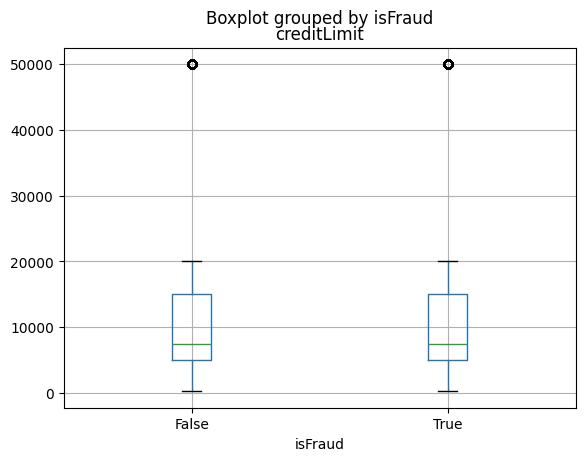

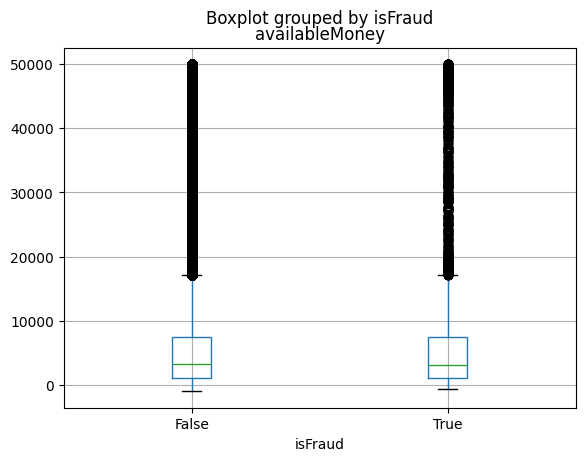

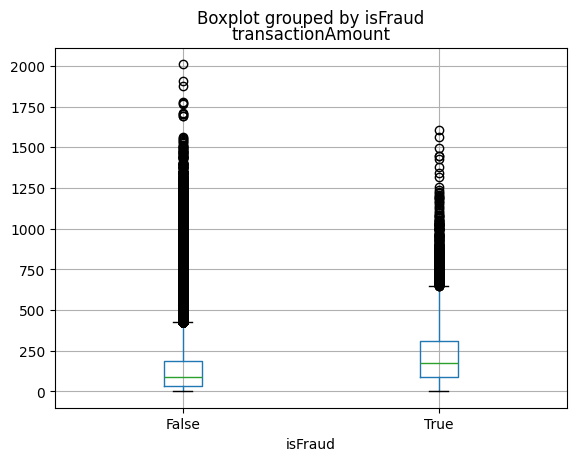

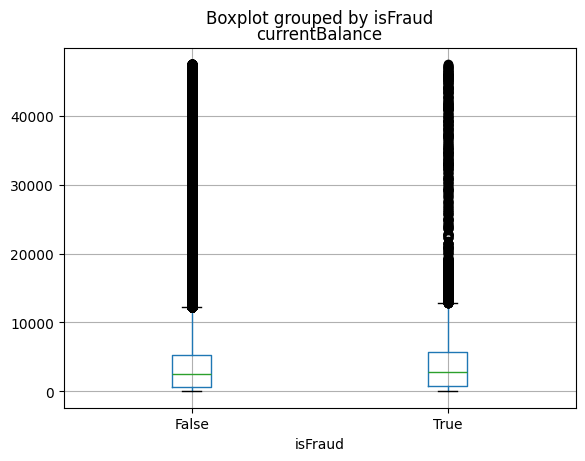

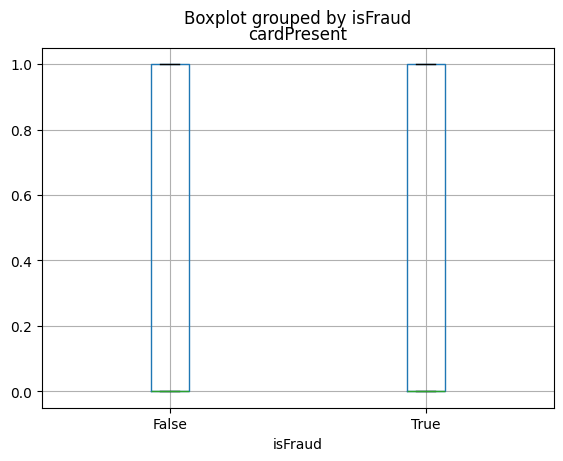

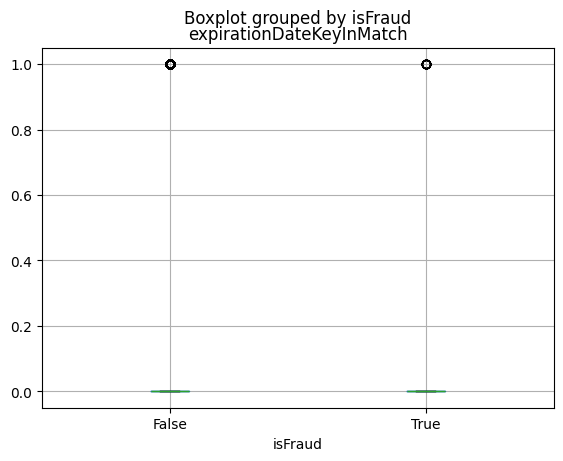

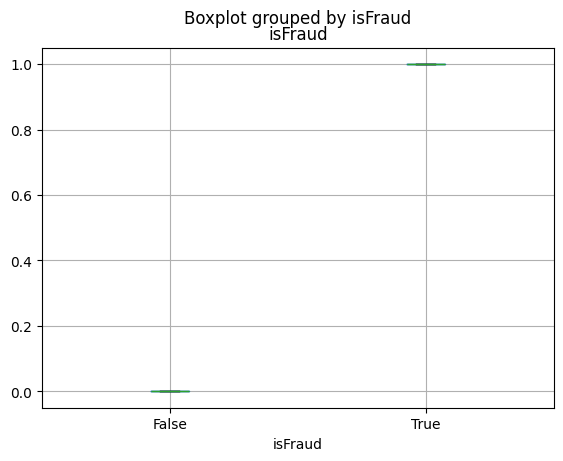

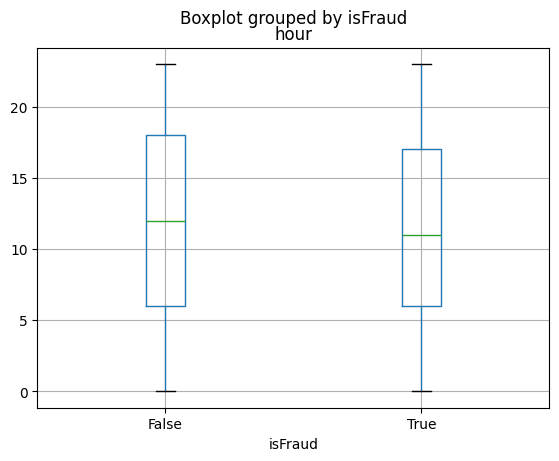

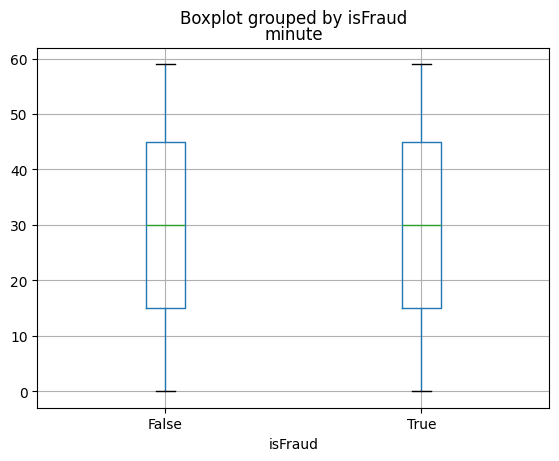

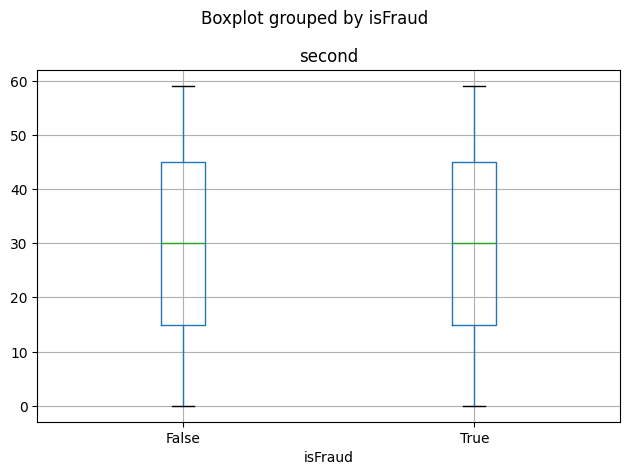

In [52]:
for col in (numeric_cols):
  df.boxplot(col, by='isFraud')

plt.tight_layout()

plt.show()

In [53]:
categorical_cols

Index(['accountNumber', 'merchantName', 'acqCountry', 'merchantCountryCode',
       'posEntryMode', 'posConditionCode', 'merchantCategoryCode',
       'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange',
       'cardCVV', 'enteredCVV', 'cardLast4Digits', 'transactionType', 'date'],
      dtype='object')

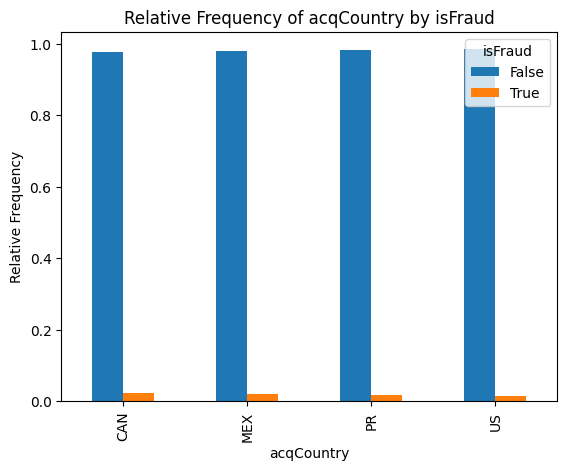

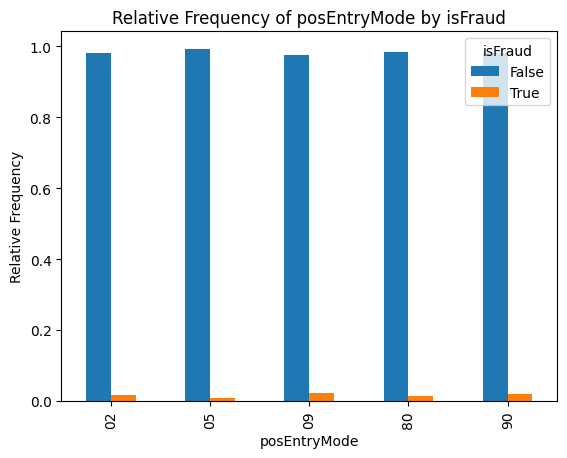

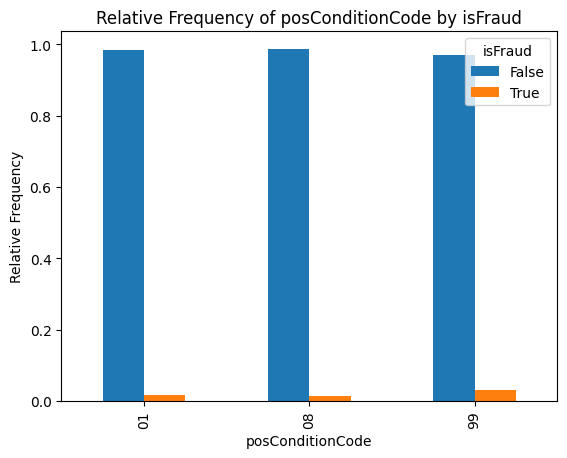

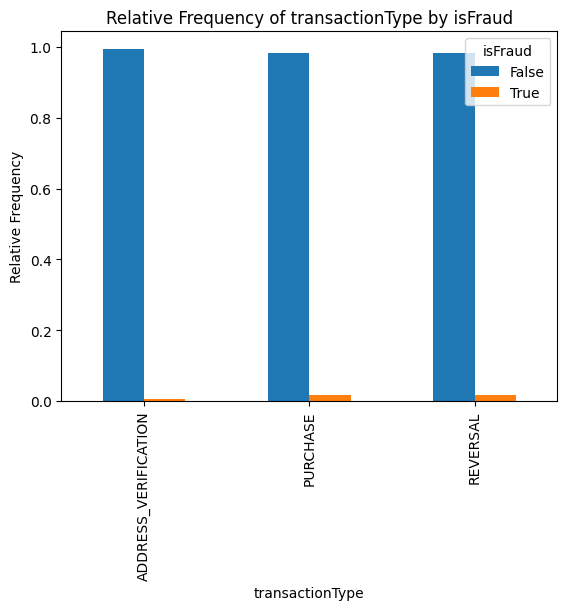

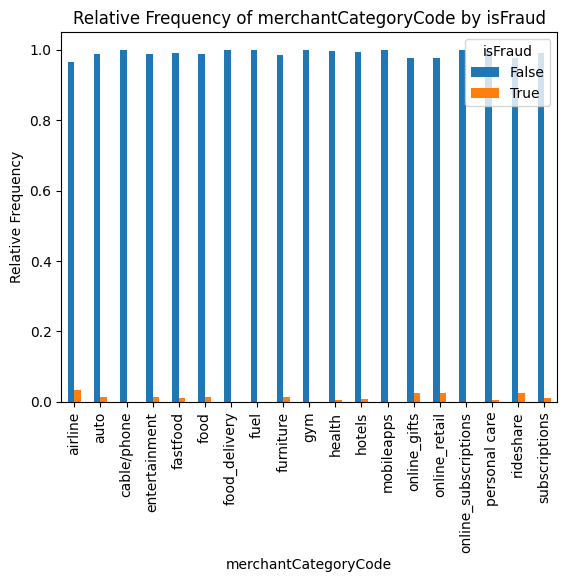

In [54]:
def plot_categorical_relative_frequency(df, categorical_var, target_var):
    # Calculate relative frequency for each category grouped by the target variable
    grouped_data = df.groupby([categorical_var, target_var]).size().unstack()
    relative_frequency = grouped_data.div(grouped_data.sum(axis=1), axis=0)
    
    # Plot the bar chart
    relative_frequency.plot(kind='bar')
    
    # Set labels and title
    plt.xlabel(categorical_var)
    plt.ylabel('Relative Frequency')
    plt.title(f'Relative Frequency of {categorical_var} by {target_var}')
    
    # Display the plot
    plt.legend(title=target_var, loc='upper right')
    plt.show()

# Example usage:
# Assuming df is your DataFrame containing the data
plot_categorical_relative_frequency(df, 'acqCountry', 'isFraud')
plot_categorical_relative_frequency(df, 'posEntryMode', 'isFraud')
plot_categorical_relative_frequency(df, 'posConditionCode', 'isFraud')
plot_categorical_relative_frequency(df, 'transactionType', 'isFraud')
plot_categorical_relative_frequency(df, 'merchantCategoryCode', 'isFraud')

In [55]:
column_to_move = 'isFraud'

# Reorder columns to move the specified column to the last position
df = df[[col for col in df.columns if col != column_to_move] + [column_to_move]];
df.head(10)

,accountNumber,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,...,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,date,hour,minute,second,isFraud
0,737265056,5000.0,5000.00,98.55,Uber,US,US,02,01,rideshare,...,1803,PURCHASE,0.00,False,False,2016-08-13,14,27,32,False
1,737265056,5000.0,5000.00,74.51,AMC #191138,US,US,09,01,entertainment,...,767,PURCHASE,0.00,True,False,2016-10-11,5,5,54,False
2,737265056,5000.0,5000.00,7.47,Play Store,US,US,09,01,mobileapps,...,767,PURCHASE,0.00,False,False,2016-11-08,9,18,39,False
3,737265056,5000.0,5000.00,7.47,Play Store,US,US,09,01,mobileapps,...,767,PURCHASE,0.00,False,False,2016-12-10,2,14,50,False
4,830329091,5000.0,5000.00,71.18,Tim Hortons #947751,US,US,02,01,fastfood,...,3143,PURCHASE,0.00,True,False,2016-03-24,21,4,46,False
5,830329091,5000.0,5000.00,30.76,In-N-Out #422833,US,US,02,01,fastfood,...,3143,PURCHASE,0.00,True,False,2016-04-19,16,24,27,False
6,830329091,5000.0,5000.00,57.28,Krispy Kreme #685312,US,US,02,01,fastfood,...,3143,PURCHASE,0.00,True,False,2016-05-21,14,50,35,False
7,830329091,5000.0,5000.00,9.37,Shake Shack #968081,US,US,05,01,fastfood,...,3143,PURCHASE,0.00,True,False,2016-06-03,0,31,21,False
8,830329091,5000.0,4990.63,523.67,Burger King #486122,None,US,02,01,fastfood,...,3143,PURCHASE,9.37,True,False,2016-06-10,1,21,46,False
9,830329091,5000.0,5000.00,164.37,Five Guys #510989,US,US,05,08,fastfood,...,3143,PURCHASE,0.00,True,False,2016-07-11,10,47,16,False


In [56]:
corr = df.drop('merchantName', axis=1).select_dtypes(exclude=['object']).corr()
corr_styled = corr.style.background_gradient(cmap='PuBu')
print(corr_styled)
corr_styled

,creditLimit,availableMoney,transactionAmount,currentBalance,cardPresent,expirationDateKeyInMatch,hour,minute,second,isFraud
creditLimit,1.000000,0.834977,0.005581,0.653652,-0.003929,0.002391,-0.001529,-0.000841,-0.000852,0.003108
availableMoney,0.834977,1.000000,-0.010070,0.129332,0.002508,0.004067,-0.003186,-0.001833,-0.001278,-0.001538
transactionAmount,0.005581,-0.010070,1.000000,0.023905,0.037361,0.001751,0.001338,-0.000259,0.000877,0.075651
currentBalance,0.653652,0.129332,0.023905,1.000000,-0.010529,-0.001285,0.001627,0.001006,0.000223,0.007715
cardPresent,-0.003929,0.002508,0.037361,-0.010529,1.000000,0.040393,0.001819,0.002629,-0.000326,-0.043418
expirationDateKeyInMatch,0.002391,0.004067,0.001751,-0.001285,0.040393,1.000000,-0.001345,0.001416,-0.000468,-0.000972
hour,-0.001529,-0.003186,0.001338,0.001627,0.001819,-0.001345,1.000000,0.001285,0.001464,-0.000867
minute,-0.000841,-0.001833,-0.000259,0.001006,0.002629,0.001416,0.001285,1.000000,-0.002169,0.000873
second,-0.000852,-0.001278,0.000877,0.000223,-0.000326,-0.000468,0.001464,-0.002169,1.000000,0.001532
isFraud,0.003108,-0.001538,0.075651,0.007715,-0.043418,-0.000972,-0.000867,0.000873,0.001532,1.000000


In [57]:
cat_col = ['merchantCountryCode','posEntryMode', 'posConditionCode','transactionType']
one_hot_encoding = pd.get_dummies(df, columns = categorical_cols);
one_hot_encoding = one_hot_encoding.astype(int);

MemoryError: Unable to allocate 3.84 GiB for an array with shape (5246, 786363) and data type bool

In [ ]:
one_hot_encoding.columns